In [1]:
import pandas as pd
import numpy as np

In [58]:
college = pd.read_csv('https://query.data.world/s/yagys7l2nzjdfcw7geogqntxan2gtw')
allstar = pd.read_excel('https://query.data.world/s/mpqk6qm6wabb23ilecwhf6uqgghkiu')

In [59]:
allstar.head()
#college.columns

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2016,Stephen Curry,G,2017-06-03 00:00:00,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016,James Harden,SG,2017-06-05 00:00:00,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016,Kevin Durant,SF,2017-06-09 00:00:00,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016,Kawhi Leonard,F,2017-06-07 00:00:00,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016,Anthony Davis,PF,2017-06-11 00:00:00,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States


In [60]:
college.head()
#college=college.drop(['Unnamed: 0','url'])
col_names = ['college', 'height', 'weight', 'name','position','NBA_ppg','NBA_g_played','NCAA_ppg','NCAA_games']
college = college[col_names]
college.head()

,college,height,weight,name,position,NBA_ppg,NBA_g_played,NCAA_ppg,NCAA_games
0,Duke University,6-10,240.0,Alaa Abdelnaby,F-C,5.7,256,8.5,134.0
1,Iowa State University,6-9,235.0,Zaid Abdul-Aziz,C-F,9.0,505,NaN,NaN
2,"University of California, Los Angeles",7-2,225.0,Kareem Abdul-Jabbar,C,24.6,1560,26.4,88.0
3,Louisiana State University,6-1,162.0,Mahmoud Abdul-Rauf,G,14.6,586,29.0,64.0
4,"University of Michigan, San Jose State University",6-6,223.0,Tariq Abdul-Wahad,F,7.8,236,NaN,NaN


In [61]:
college=college.rename(columns={"college": "College", "position": "Pos","height":"HT","weight":"WT","name":"Player"})
college.head()

,College,HT,WT,Player,Pos,NBA_ppg,NBA_g_played,NCAA_ppg,NCAA_games
0,Duke University,6-10,240.0,Alaa Abdelnaby,F-C,5.7,256,8.5,134.0
1,Iowa State University,6-9,235.0,Zaid Abdul-Aziz,C-F,9.0,505,NaN,NaN
2,"University of California, Los Angeles",7-2,225.0,Kareem Abdul-Jabbar,C,24.6,1560,26.4,88.0
3,Louisiana State University,6-1,162.0,Mahmoud Abdul-Rauf,G,14.6,586,29.0,64.0
4,"University of Michigan, San Jose State University",6-6,223.0,Tariq Abdul-Wahad,F,7.8,236,NaN,NaN


In [62]:
college=college.set_index("Player")
allstar=allstar.set_index("Player")

In [63]:
result = pd.merge(college, allstar, how='inner', left_index=True, right_index=True)
result=result.drop(["Pos_y","HT_y","WT_y"],axis=1)
result.head()

,College,HT_x,WT_x,Pos_x,NBA_ppg,NBA_g_played,NCAA_ppg,NCAA_games,Year,Team,Selection Type,NBA Draft Status,Nationality
Player,,,,,,,,,,,,,
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2015,Atlanta Hawks,Eastern All-Star Replacement Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2014,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2010,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2009,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Allan Houston,University of Tennessee,6-6,200.0,G,17.3,839,21.9,128.0,2000,New York Knicks,Eastern All-Star Coaches Selection,1993 Rnd 1 Pick 11,United States


In [64]:
result=result.rename(columns={"HT_x":"HT","WT_x":"WT","Pos_x":"Pos","Year":"Year of All-star selection"})
result.head()

,College,HT,WT,Pos,NBA_ppg,NBA_g_played,NCAA_ppg,NCAA_games,Year of All-star selection,Team,Selection Type,NBA Draft Status,Nationality
Player,,,,,,,,,,,,,
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2015,Atlanta Hawks,Eastern All-Star Replacement Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2014,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2010,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2009,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Allan Houston,University of Tennessee,6-6,200.0,G,17.3,839,21.9,128.0,2000,New York Knicks,Eastern All-Star Coaches Selection,1993 Rnd 1 Pick 11,United States


In [65]:

result.head()

,College,HT,WT,Pos,NBA_ppg,NBA_g_played,NCAA_ppg,NCAA_games,Year of All-star selection,Team,Selection Type,NBA Draft Status,Nationality
Player,,,,,,,,,,,,,
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2015,Atlanta Hawks,Eastern All-Star Replacement Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2014,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2010,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2009,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
Allan Houston,University of Tennessee,6-6,200.0,G,17.3,839,21.9,128.0,2000,New York Knicks,Eastern All-Star Coaches Selection,1993 Rnd 1 Pick 11,United States


In [103]:
dupli=result

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [108]:
dupli=dupli.dropna()

In [124]:
model = sm.OLS.from_formula("NBA_g_played ~ NBA_ppg + NCAA_games + NCAA_ppg", data=dupli)
result2 = model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           NBA_g_played   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     12.78
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           6.69e-08
Time:                        15:31:58   Log-Likelihood:                -2267.3
No. Observations:                 320   AIC:                             4543.
Df Residuals:                     316   BIC:                             4558.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    439.4199     93.359      4.707      0.000     255.737     623.103
NBA_ppg        4.2274      4.596      0.920      0.358      -4.816      13.270
NCAA_games     3.0663      0.527      5.821      0.000       2.030       4.103
NCAA_ppg       9.3690      5.297      1.769      0.078      -1.053      19.791
==============================================================================
Omnibus:                        7.775   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                5.726
Skew:                          -0.209   Prob(JB):                       0.0571
Kurtosis:                       2.496   Cond. No.                         492.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

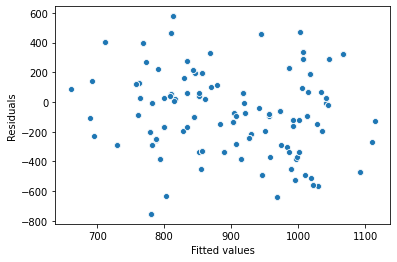

In [125]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

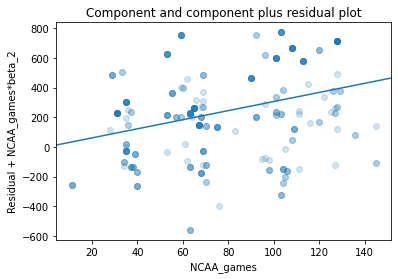

In [126]:
from statsmodels.graphics.regressionplots import plot_ccpr

ax = plt.axes()
plot_ccpr(result,"NCAA_games", ax)
_ = ax.lines[0].set_alpha(0.2)

In [128]:
dupli.to_csv('NBA_Data.csv')